In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ocorrencias = pd.read_csv('ocorrencia.csv', encoding='latin1', sep=';')
fatores = pd.read_csv('fator_contribuinte.csv', encoding='latin1', sep=';')

ocorrencias_graves = ocorrencias[ocorrencias['ocorrencia_classificacao'].isin(['ACIDENTE', 'INCIDENTE GRAVE'])].copy()

ocorrencias_fatores = pd.merge(ocorrencias_graves, fatores, on='codigo_ocorrencia3', how='inner')

lista_colunas = ['codigo_ocorrencia3','ocorrencia_classificacao', 'fator_aspecto'] #filtrando colunas
analise = ocorrencias_fatores[lista_colunas].copy()
analise.head(5)

fator_humano = analise['fator_aspecto'] == 'DESEMPENHO DO SER HUMANO'
proporcao = fator_humano.mean()

In [9]:
#bootstrap H0 (50%)

h0_proporcao = 0.5

tamanho_amostra = len(analise)

mundo_nulo = np.random.choice([True, False], size=tamanho_amostra, p=[h0_proporcao, 1 - h0_proporcao])

x = []
for i in range(10000):
    amostra = np.random.choice(mundo_nulo, size=tamanho_amostra, replace=True)
    prop = amostra.mean()
    x.append(prop)


In [14]:
#bootstrap H0 (60%)

h0_proporcao = 0.6

tamanho_amostra = len(analise)

mundo_nulo = np.random.choice([True, False], size=tamanho_amostra, p=[h0_proporcao, 1 - h0_proporcao])

x = []
for i in range(10000):
    amostra = np.random.choice(mundo_nulo, size=tamanho_amostra, replace=True)
    prop = amostra.mean()
    x.append(prop)

In [15]:
#bootstrap Ha

y = []

for i in range(10000):
    amostra = np.random.choice(fator_humano, size=tamanho_amostra, replace=True)
    prop = amostra.mean()
    y.append(prop)

ic_inferior = np.percentile(y, 2.5)
ic_superior = np.percentile(y, 97.5)

print(f"Proporção observada: {fator_humano.mean():.2%}")
print(f"Intervalo de Confiança de 95%: [{ic_inferior:.2%}, {ic_superior:.2%}]")


Proporção observada: 58.28%
Intervalo de Confiança de 95%: [57.22%, 59.32%]


In [16]:
#p-valor

x = np.array(x)
contagem = np.sum(x >= proporcao)
p_valor = contagem/10000

print(p_valor)

0.9983


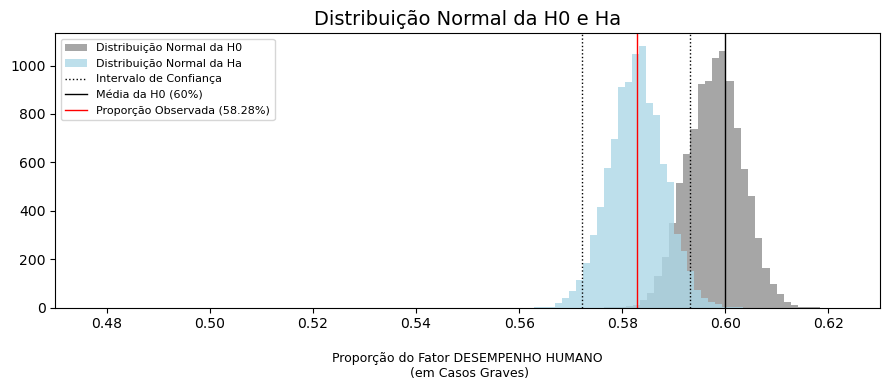

In [17]:
plt.figure(figsize=(9, 4))

plt.hist(x, bins=30, alpha=0.7, 
         label='Distribuição Normal da H0', color='gray')

plt.hist(y, bins=30, alpha=0.8, 
         label='Distribuição Normal da Ha', color='lightblue')

plt.axvline(ic_inferior, color='black', linestyle='dotted', linewidth=1, label=f'Intervalo de Confiança')
plt.axvline(ic_superior, color='black', linestyle='dotted', linewidth=1)

plt.axvline(h0_proporcao, color='black', linestyle='solid', linewidth=1, 
            label=f'Média da H0 ({h0_proporcao:.0%})')

plt.axvline(proporcao, color='red', linestyle='solid', linewidth=1, 
            label=f'Proporção Observada ({proporcao:.2%})')

plt.title('Distribuição Normal da H0 e Ha', fontsize=14)
plt.xlabel('\nProporção do Fator DESEMPENHO HUMANO\n (em Casos Graves)', fontsize=9)

plt.legend(loc='best', fontsize=8)

plt.xlim(0.47, 0.63)

plt.tight_layout()

#plt.savefig('teste-de-hipoteses-fator-humano.png', bbox_inches='tight')

plt.show()